# Generate top-ten tokens for each cluster (Twitter)

In [3]:
# Initialization work
import pandas as pd

filename ="C:\Users\dropa\Documents\comet\twitter_comet\Twts1722-Labeled-k5k10-Cos-Euc-METADATA.csv" #input("Enter the file path of the Twitter data file")
cluster_count = "7" # the most sense
twitter_data = pd.read_csv(filename)
twitter_data.head()

C:\Users\dropa\AppData\Local\Temp\ipykernel_10104\3396275963.py:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,13,14,15,16,18,19,20,21,23,30,31,32,33,34,35,36,47,49,50,51,52,53,55,56,57,58,59,60,74) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data = pd.read_csv(filename)


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,id.1,mentions,text.1,clntxt,5,6,7,8,9,10
0,947617736531755010,947617736531755010,NaN,NaN,NaN,358543352,NaN,NaN,NaN,2017-12-31T23:57:28.000Z,...,947617736531755010,NaN,2018/01/01 08:57:01\nPing: 34.003 ms\nDownload...,Ping: ms Download: Mbit/s Upload: Mbit/s,2,5,2,0,5,3
1,947614726300696576,947614726300696576,NaN,NaN,NaN,1046909316,NaN,NaN,NaN,2017-12-31T23:45:31.000Z,...,947614726300696576,"{'id': '43123762', 'username': 'Speedtest'}",Check out my @Speedtest result! How fast is yo...,Check out my Speedtest result! How fast is you...,1,1,4,5,4,7
2,947608380771840005,947608380771840005,NaN,NaN,NaN,3361492523,NaN,NaN,NaN,2017-12-31T23:20:18.000Z,...,947608380771840005,"{'id': '89587925', 'username': 'comcast'}",Current Speedtest for SecurePasswords - Provid...,Current Speedtest for SecurePasswords - Provid...,1,0,4,3,8,7
3,947607851199016961,947607851199016961,NaN,947590594913886208.0,NaN,2859085459,NaN,20291202.0,NaN,2017-12-31T23:18:12.000Z,...,947607851199016961,NaN,So Netflix set up a Internet speed test site h...,So Netflix set up a Internet speed test site s...,1,0,3,6,6,6
4,947607711159644161,947607711159644161,NaN,947590594913886208.0,NaN,91438534,NaN,20291202.0,NaN,2017-12-31T23:17:38.000Z,...,947607711159644161,NaN,So Netflix set up a Internet speed test site h...,So Netflix set up a Internet speed test site s...,1,0,3,6,6,6


At this point, we need to sort which posts correspond to which clusters (consider, one post can belong to multiple clusters)

In [4]:
reduced_data = twitter_data[["id", "clntxt", cluster_count]]

reduced_data.head()

,id,clntxt,7
0,947617736531755010,Ping: ms Download: Mbit/s Upload: Mbit/s,2
1,947614726300696576,Check out my Speedtest result! How fast is you...,4
2,947608380771840005,Current Speedtest for SecurePasswords - Provid...,4
3,947607851199016961,So Netflix set up a Internet speed test site s...,3
4,947607711159644161,So Netflix set up a Internet speed test site s...,3


In [5]:
# function to tokenize text
from pprint import pprint
import string
import nltk
nltk.download('stopwords')
import nltk.tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

custom_filter_words = ["nan", "hey", "baj", "wowway", "though", "even", "gaye", 'u', "guys" ]
stop_words = set(stopwords.words('english'))

token_maker = nltk.tokenize.TweetTokenizer()


def df_tokenize(text):
    translate_table = dict((ord(char), None) for char in string.punctuation) # Remove punctuation
    tweet_text = text.to_string(index=False).translate(translate_table).lower()
    tokens = token_maker.tokenize(tweet_text)

    # remove extra stop words
    filtered_tokens = [w for w in tokens if w.lower() not in stop_words]
    filtered_tokens = [w for w in filtered_tokens if w.lower() not in custom_filter_words]
    
    return filtered_tokens


sorted_tokens = {}

# operate one cluster at a time
for iter in range(int(cluster_count)):
    cluster_n = reduced_data[reduced_data[cluster_count] == int(iter)]
    # Tokenize text in every column
    sorted_tokens[f"cluster_{iter}"] = (
        cluster_n[["clntxt"]]
        .apply(
            df_tokenize,
            axis=1,
        )
        .explode()
        .reset_index(drop=True)
        .value_counts()
        .rename_axis("token")
        .reset_index(name="frequency")
        .sort_values(["frequency"], ascending=False)
        #.to_csv(f"~/Desktop/cluster_word_freq_clstr{iter}.csv")
    )


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dropa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


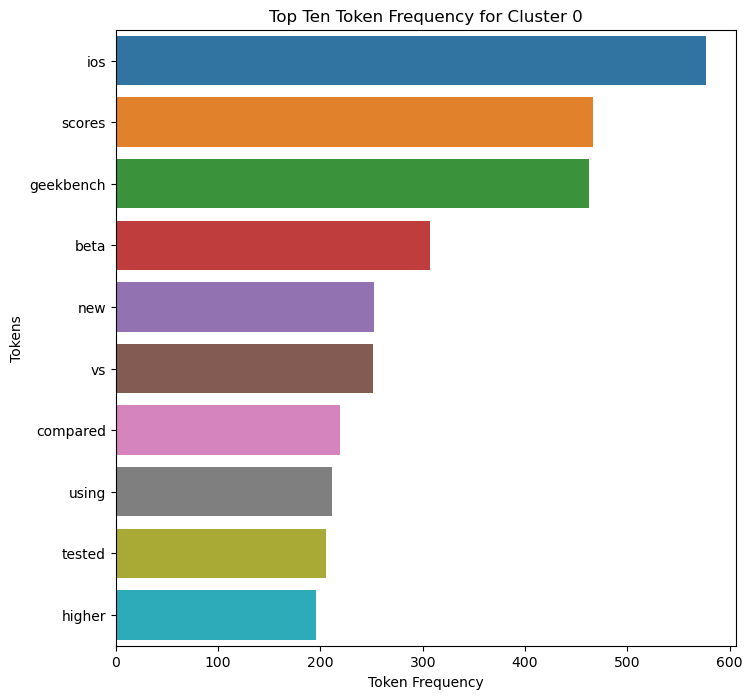

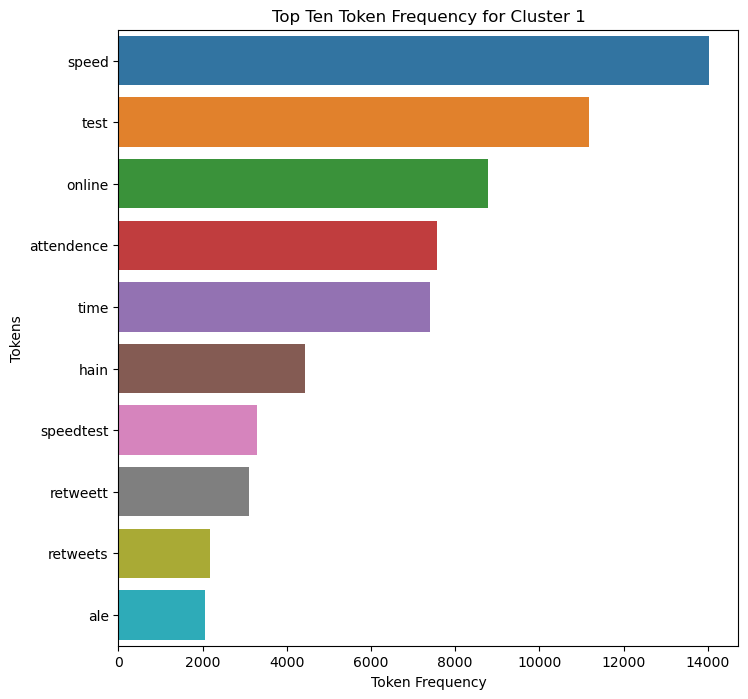

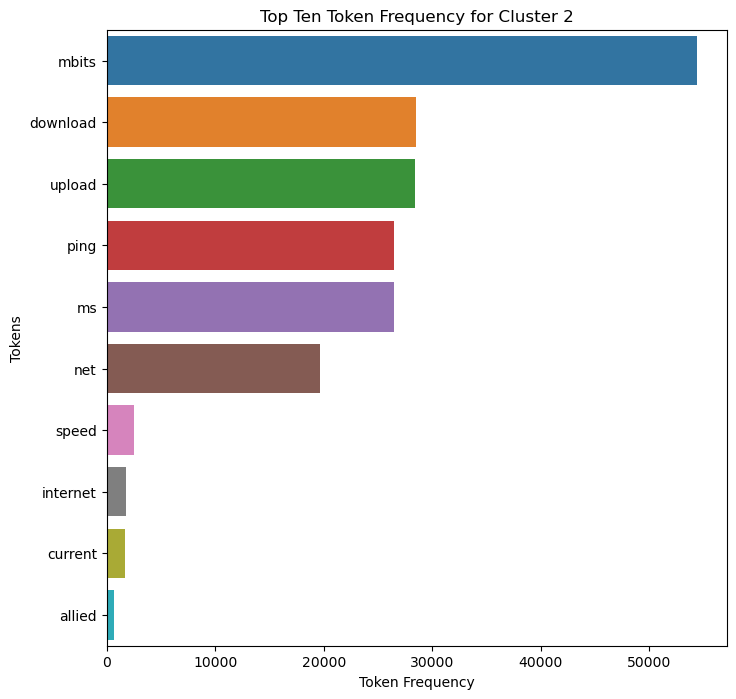

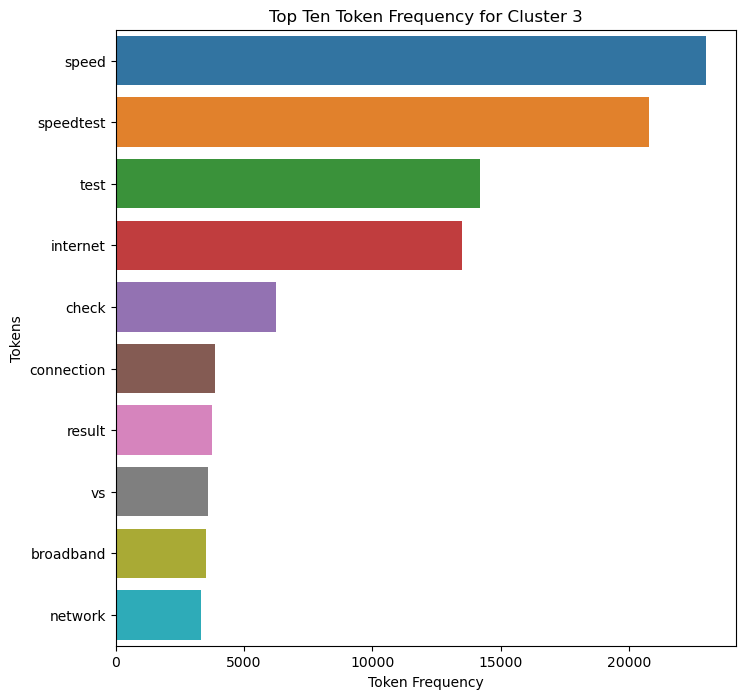

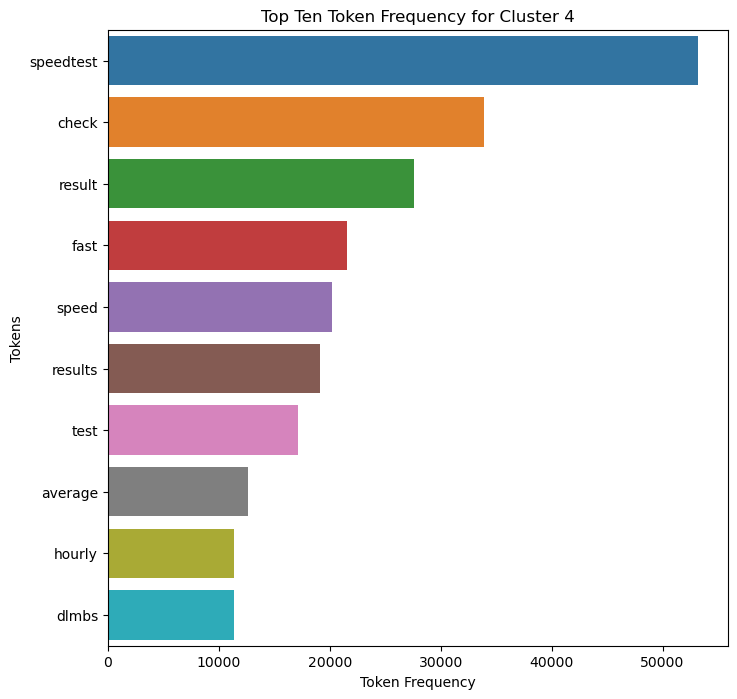

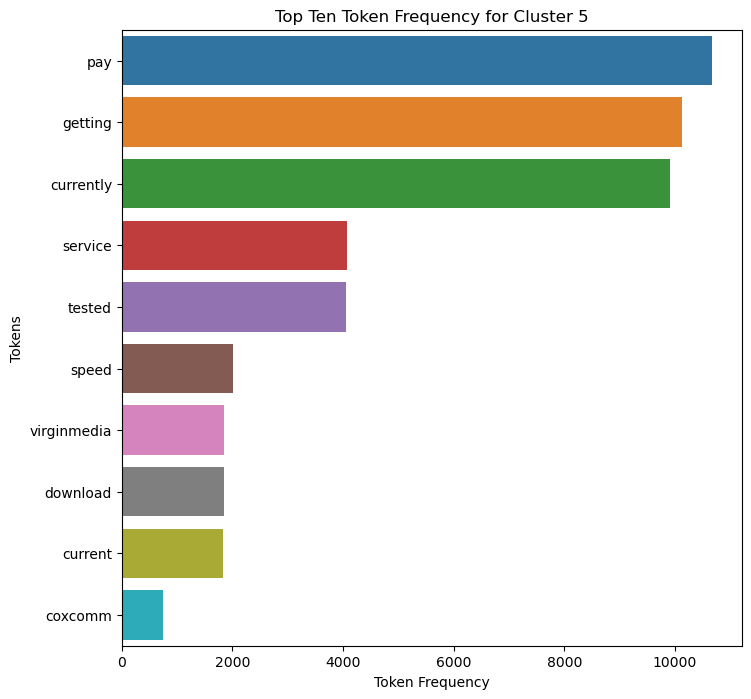

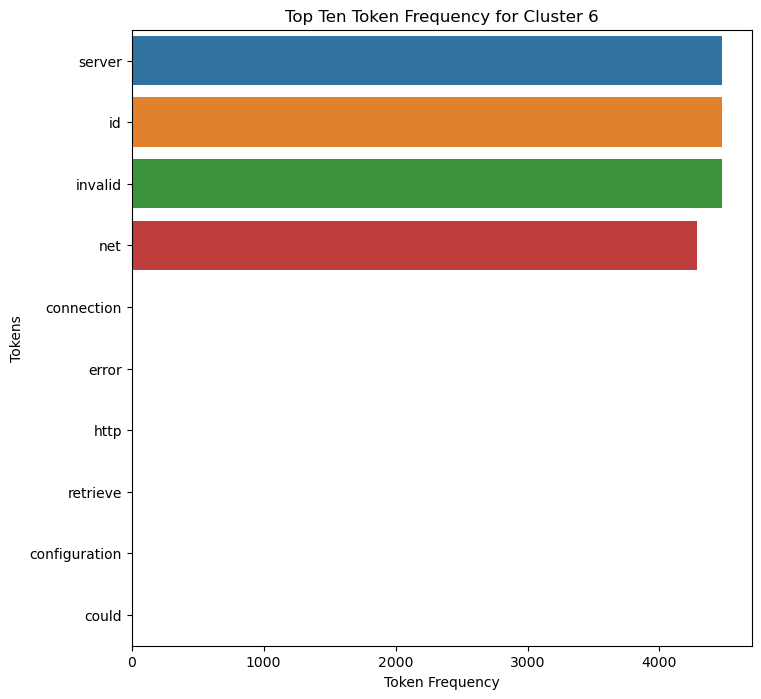

In [6]:
# Visualizations
import seaborn as sns


for iter, key in enumerate(sorted_tokens.keys()):
#     print(key)
#     pprint(sorted_tokens[key].head(10)) # Prints the top 10 tokens table
#     print('\n\n')

    ####### Word cloud code ########
    # wordcloud = WordCloud(width=800, height = 800, background_color='white').generate(" ".join(sorted_tokens[key]["token"].tolist()))
    plt.figure(figsize=(8,8), facecolor=None)
    # plt.title(f"Cluster {iter}")
    # plt.imshow(wordcloud)
    # plt.axis("off")
    # plt.tight_layout(pad=0)

    ######## Top 10 Word frequency graph ########
    sns.barplot(x="frequency", y="token", data=sorted_tokens[key][:10]).set(title=f"Top Ten Token Frequency for Cluster {iter}", xlabel="Token Frequency", ylabel="Tokens")
    

plt.show()

normalize on scale from 0 to 1 for each graph

how many total tokens/total tokens